<a href="https://colab.research.google.com/github/tingtingting118/tingtingcode/blob/master/KMeans_Clustering_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file = files.upload()

Saving customer_segments.csv to customer_segments.csv


In [0]:

from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


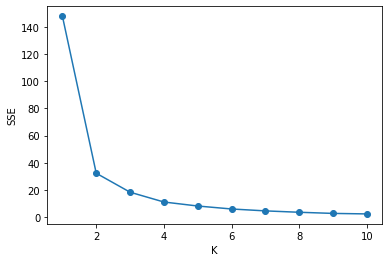

      cust_id    seg_name  num_of_orders  revenue  Cluster
0        4402    ONE-OFFS              1    24.99        1
1       11248       LOYAL              1   194.75        2
2       12064  INFREQUENT              1    93.98        2
3       15088    ONE-OFFS              1   231.95        1
4       66706  INFREQUENT              2    75.78        2
..        ...         ...            ...      ...      ...
966  21233469         NEW              1   118.48        1
967  21233549         NEW              1    71.99        1
968  21233596         NEW              1    88.99        1
969  21233911         NEW              1    60.18        1
970  21233988         NEW              1    68.99        1

[971 rows x 5 columns]


In [6]:
data = pd.read_csv('customer_segments.csv')

train_x = data[["seg_name","num_of_orders","revenue"]]
labelEncoder = LabelEncoder()
labelEncoder.fit(train_x['seg_name'])
train_x['seg_name'] = labelEncoder.transform(train_x['seg_name'])

#normalize data
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

#split customers into  classes
sse = []
for k in range(1, 11):
	# k-means
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	
	sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()



In [25]:
#Since I figured out K=2 clusters is the optimal choice, I changed k to 2 clusters 
# Choose K = 2
kmeans = KMeans(n_clusters=2)
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# Combine with original data with customer id 
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:'Cluster'},axis=1,inplace=True)
print(result)

      cust_id    seg_name  num_of_orders  revenue  Cluster
0        4402    ONE-OFFS              1    24.99        1
1       11248       LOYAL              1   194.75        0
2       12064  INFREQUENT              1    93.98        0
3       15088    ONE-OFFS              1   231.95        1
4       66706  INFREQUENT              2    75.78        0
..        ...         ...            ...      ...      ...
966  21233469         NEW              1   118.48        1
967  21233549         NEW              1    71.99        1
968  21233596         NEW              1    88.99        1
969  21233911         NEW              1    60.18        1
970  21233988         NEW              1    68.99        1

[971 rows x 5 columns]


In [0]:
import plotly
import plotly.graph_objs as go

In [26]:
# Visualize cluster shapes in 3d.(only consider 2019, 2019 Rank)

cluster1=result.loc[result['Cluster'] == 0]
cluster2=result.loc[result['Cluster'] == 1]


scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.iloc[:,1], y = cluster1.iloc[:,2], z = cluster1.iloc()[:,3],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.iloc[:,1], y = cluster2.iloc[:,2], z = cluster2.iloc()[:,3],
    marker = dict( size=2, color='blue')
)

cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.iloc[:,1], y = cluster1.iloc[:,2], z = cluster1.iloc()[:,3],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.iloc[:,1], y = cluster2.iloc[:,2], z = cluster2.iloc()[:,3],
    color='blue', showscale = True
)

layout = dict(
    title = 'Customer Segmentation into 2 Groups',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2,cluster1, cluster2], layout=layout )
# Use py.iplot() for IPython notebook
#Use in Colab :
plotly.offline.iplot(fig, filename='mesh3d_sample')


In [0]:
#Output into a dataset
result.to_csv("customer_clustering.csv")
files.download("customer_clustering.csv")